<a href="https://colab.research.google.com/github/a-a-john/HYRS-2022-Project/blob/main/HYRS_Project_(balanced_data_with_SMOTE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my 2022 High School Youth Researcher Summer (HYRS) Program Project completed under the supervision of Ken Cheeliger and mentorship of Dr. Yuan (Shawn) Xu.

The objective: To train a Machine Learning algorithm to identify when an individual has lung cancer, then predict whether someone has cancer given a variety of factors.
Potential applications of this project include streamlining patient diagnosis, and predicting likeliness of cancer in response to patient questionaires.

The data used in this project was provided by my supervisor, Ken Cheeliger. Because the data is imbalanced, Synthetic Minority Oversampling Technique (SMOTE) was used to create a more balanced dataset. Precision and recall are evaluated, with high scores indicating that the model is well fitted.

A big thanks to the University of Calgary, Alberta Innovates and those at the Centre for Health Informatics, especially Ken Cheeliger Dr. Yuan (Shawn) Xu for the opportunity to create a project that both resonated with me and acted as an introduction to Machine Learning.

In [ ]:
#importing packages

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
# reading data

data_url = "https://raw.githubusercontent.com/clger007/SummerProject/main/survey%20lung%20cancer.csv"
lung_cancer_df = pd.read_csv(data_url)

In [ ]:
###making adjustments to the dataset

#transfer gender to data: M->1, F->2
def converter(gender_string):
# here use a simple function to convert M to 1, F to 2,
    if gender_string == 'M':
        return 1
    else:
        return 2

lung_cancer_df['GENDER'] = lung_cancer_df['GENDER'].apply(converter)


#transfer lung cancer classififcation to data: YES->2, NO->1        this is because the rest of the variables follow the same format
def converter_2(lc_str):
    if lc_str == 'YES':
        return 2
    else:
        return 1

lung_cancer_df['LUNG_CANCER'] = lung_cancer_df['LUNG_CANCER'].apply(converter_2)


In [ ]:
#notice that the result is on the right hand side

lung_cancer_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2,56,1,1,1,2,2,2,1,1,2,2,2,2,1,2
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,2


In [ ]:
#slicing to assign the data in the independent variables to X and the dependent variable to y

var_columns = [c for c in lung_cancer_df.columns if c not in ['LUNG_CANCER']]
X = lung_cancer_df.loc[:,var_columns]
y = lung_cancer_df.loc[:,'LUNG_CANCER']

In [ ]:
#split data into training and validation data (20% of data is used for testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((247, 15), (62, 15), (247,), (62,))

In [ ]:
#count to see how imbalanced the dataset is

np.bincount(y_train)

array([  0,  34, 213])

In [ ]:
#using SMOTE to oversample

smt = SMOTE(random_state=31)
X_res_train, y_res_train = smt.fit_resample(X_train, y_train)

In [ ]:
#count to see the SMOTE effect

np.bincount(y_res_train)

array([  0, 213, 213])

In [ ]:
#setting up a decision tree classifier and fitting it to the SMOTE training data

clf = DecisionTreeClassifier(max_leaf_nodes=11, random_state=31)
clf.fit(X_res_train, y_res_train)

DecisionTreeClassifier(max_leaf_nodes=11, random_state=31)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

#Precision is how many of the models' positive predictions are actually positive.
#Recall is how many of the total positive classes the model predicted correctly.

              precision    recall  f1-score   support

           1       0.33      0.20      0.25         5
           2       0.93      0.96      0.95        57

    accuracy                           0.90        62
   macro avg       0.63      0.58      0.60        62
weighted avg       0.88      0.90      0.89        62



In [ ]:
list_of_tuples = list(zip(y_test, y_pred))
list_of_tuples

df_comparison = pd.DataFrame(list_of_tuples,
                  columns = ['Actual Test Data', 'Prediction'])
df_comparison

,Actual Test Data,Prediction
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
57,2,2
58,2,2
59,2,2
60,1,1


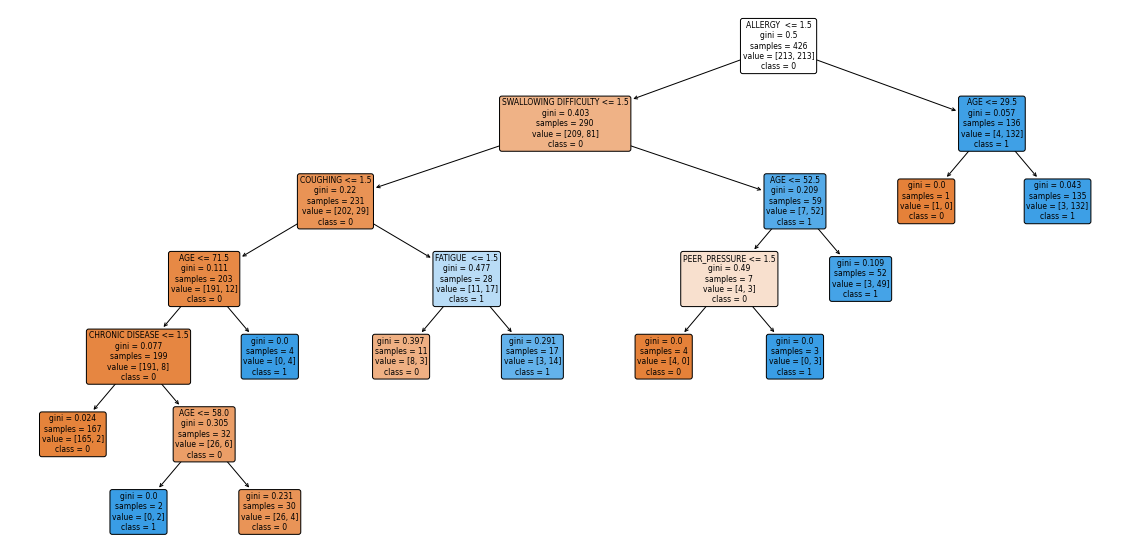

In [ ]:
#plotting the decision tree

#Create the figure
plt.figure(figsize=(20,10))

#Create the tree plot
plot_tree(clf,
           feature_names = var_columns, #Feature names
           class_names = ["0","1"], #Class names
           rounded = True,
           filled = True)

plt.show()